**Aplicación de Métodos de Monte Carlo a la Computación Bayesiana**

Inferencia Bayesiana (Teorema de Bayes)<a href="#Inferencia-Bayesiana-(Teorema-de-Bayes)" class="anchor-link">¶</a>
-------------------------------------------------------------------------------------------------------------------

### Introducción<a href="#Introducción" class="anchor-link">¶</a>

En un *enfoque bayesiano* de la estadística, un parámetro \$\\theta\$ se
considera una variable aleatoria con una determinada distribución de
probabilidad. El teorema de Bayes relaciona la información inicial que
se tiene del parámetro \$\\theta\$ antes de realizar un experimento y la
información que se dispone después de realizar el experimento.

-   La información inicial que se tiene sobre \$\\theta\$ se representa
    mediante su *distribución a priori* \$\\pi(\\theta)\$

-   La información que se tiene de \$\\theta\$ después de realizar uno
    (o varios) experimento/s, \$x\$, se codifica mediante su
    *distribución a posteriori* \$\\pi(\\theta \| x)\$.

-   El teorema de Bayes nos permite obtener la densidad de probabilidad
    \$\\pi(\\theta \| x)\$ en función del resultado del experimento y la
    densidad de probabilidad a priori \$\\pi(\\theta)\$

\$\$ \\pi(\\theta \| x) = \\frac{ \\pi(x \| \\theta) } {
\\int\_{-\\infty}^{\\infty} \\pi(x \| \\theta) \\pi(\\theta) \\;
d\\theta} \\; \\pi(\\theta) \$\$

-   La cantidad \$\\pi(x \| \\theta)\$ del numerador se denomina
    *verosimilitud* (*likelihood*). Es una **función** y representa la
    probabilidad de observar el resultado del experimento \$x\$
    (muestra) en función del valor del parámetro \$\\theta\$

    \$\$ \\pi(x \| \\theta) = \\prod\_i f(x\_i \| \\theta) \$\$

    siendo \$x\_i\$ con \$i=1, \\ldots, n\$ los resultados del
    experimento (valores muestrales) y \$f(x\_i \| \\theta)\$ sus
    probabilidades para un determinado valor de \$\\theta\$.

-   El denominador \$ \\int\_{-\\infty}^{\\infty} \\pi(x \| \\theta)
    \\pi(\\theta) \\; d\\theta\$, una vez realizada la integración,
    **no** depende del parámetro \$\\theta\$. Es una constante de
    normalización.

-   Para realizar previsiones se utilizan *distribuciones predictivas*
    (valor esperado de una determinada función)

    \$\$ E\[ g(y\|x) \] = \\int g(y\| \\theta) \\; \\pi(\\theta \| x)
    \\; d\\theta \$\$

    Por ejemplo, es habitual usar como *predictor* del valor de la v.a
    \$\\theta\$ su valor esperado: \$\$ \\widehat{\\theta} = \\int
    \\theta \\; \\pi(\\theta \| x) \\; d\\theta \$\$

-   Cuando las distribuciones a priori y a posteriori son del mismo tipo
    se dice que son "conjugadas a priori". A menudo esto implica grandes
    beneficios desde el punto de vista computacional.

-   La descripción formal de la inferencia bayesiana es sencilla, sin
    embargo su implementación **habitualmente no es fácil** y requiere
    Métodos de Monte Carlo.

Ejercicio 1<a href="#Ejercicio-1" class="anchor-link">¶</a>
-----------------------------------------------------------

\begin{exercise} 

Estimar la probabilidad de que un paciente ingresado
en planta acabe en la UCI. Para realizar este problema mediante
inferencia Bayesiana debemos tener en cuenta: 
* La probabilidad de que un paciente ingresado en planta acabe en la UCI será nuestro parámetro
\$\\theta\$. Como hemos visto, en el enfoque bayesiano debemos
considerar que \$\\theta\$ es una variable aleatoria. 
* Debemos conocer
la distribución de la v.a \$\\theta\$ \*\*antes\*\* de realizar el
experimento, es decir su \*densidad de probabilidad a priori\*
\$\\pi(\\theta)\$. Supongamos, por ejemplo, que \$\\pi(\\theta) =
B(\\theta \| \\alpha = 5, \\beta = 10)\$. 
* Debemos incorporar el
resultado del experimento. Considerad el siguiente experimento: se
contabiliza cuantos de los pacientes que hay en planta (\$n\$) deben
ingresar en la UCI (\$k\$). Se observa que de los \$n=20\$ pacientes en
planta \$k=1\$ ingresan en la UCI. 
    * Debemos calcular la función de
verosimilitud \$\\pi(x \| \\theta)\$ del resultado del experimento. La
función de verosimilitud será proporcional a la probabilidad de observar
el resultado del experimento en función del valor de \$\\theta\$): \$\$
\\pi(x \| \\theta) \\propto \\theta^k (1-\\theta)^{n-k} \$\$ donde, en
este caso, habría que substituir \$n=20\$ y \$k=1\$. Notad como en la
ecuación anterior \$\\pi(x\|\\theta)\$ \*\*no\*\* está normalizada. 
* Debemos elegir un \*predictor\* adecuado a nuestro problema. Como
predictor de \$\\theta\$ \*la probabilidad de que un paciente de la
planta acabe en la UCI\* utilizaremos su valor esperado
\$E\[\\theta\]\$. Nos preguntarnos entonces: 
    1. ¿Cuál es el valor de
\$E\[\\theta\]\$ \*\*antes\*\* de realizar el experimento? 
    2. ¿Cuál es
el valor de \$E\[\\theta\]\$ \*\*después\*\* de observar el resultado
del experimento? \*\*Ayuda\*\* \* La pregunta (1) es fácil. Al ser la
distribución a priori \$\\pi(\\theta)\$ la distribución \$Beta\$, su
valor esperado será \$\$ \\mu\_{\\text{prior}} =
E\[\\theta\]\_{\\text{prior}} = \\int\_{-\\infty}^{\\infty} \\theta \\;
B(\\theta \| \\alpha, \\beta) \\; d\\theta = \\frac{\\alpha}{\\alpha +
\\beta} \$\$ \* Para la pregunta (2) se debe calcular: \$\$
\\mu\_{\\text{posterior}}= E\[\\theta\]\_{\\text{posterior}} =
\\int\_{-\\infty}^{\\infty} \\theta \\; \\pi(\\theta \| x) \\; d\\theta
\$\$ Para ello se necesita conocer la distribución a posteriori
\$\\pi(\\theta \| x)\$. Utilizando el teorema de Bayes, tras re-ordenar
términos se obtiene: 

\begin{align*} 
E[\theta]_{\text{posterior}} &=
\int_{-\infty}^{\infty} \theta \; \pi(\theta | x) \; d \theta 
\\ &= \int\_{-\infty}^{\infty} \theta \; \frac{ \pi(x |
\theta) \; \pi(\theta) } { \int_{-\infty}^{\infty} \pi(x |
\theta) \pi(\theta) \; d \theta} \; d \theta = \frac{
\int_{-\infty}^{\infty} \theta \; \pi(x | \theta) \;
\pi(\theta) \; d \theta } { \int_{-\infty}^{\infty} \pi(x |
\theta) \; \pi(\theta) \; d \theta} 
\\ &= \frac{\int_{-\infty}^{\infty} \theta \; \theta^k
(1-\theta)^{n-k} \; \; \pi(\theta) \; d \theta } {
\int_{-\infty}^{\infty} \pi(x | \theta) \; \pi(\theta) \;
d \theta} = \frac{ \int_{0}^{1} \; \theta^{k+1} (1-\theta)^{n-k}
\; \; B(\theta | \alpha=5, \beta=10) \; d \theta } {
\int_{0}^{1} \theta^{k} (1-\theta)^{n-k} \; B(\theta | \alpha=5,
\beta=10) \; d \theta}
\end{align*} 

donde se han sustituído los
valores de $\pi(\theta)$ y de la verosimilitud $\pi(x | \theta)$
. Sino supiésemos resolver analíticamente las integrales anteriores (en
este caso sí hay solución analítica aunque no es fácil) podemos
**estimar** el numerador y el denominador mediante integración de
Monte Carlo. 

\end{exercise}

### SOLUCIÓN<a href="#SOLUCIÓN" class="anchor-link">¶</a>

#### Solución analítica: aplicación teoría de Bayes<a href="#Solución-analítica:-aplicación-teoría-de-Bayes" class="anchor-link">¶</a>

En el problema se sugiere utilizar una estrategia de Monte Carlo para
estimar el valor esperado de la distribución de probabilidad *a
posteriori* de \$\\theta\$, siendo \$\\theta\$ la probabilidad de que un
paciente en planta ingrese en la UCI.

En realidad, en este caso concreto, **no** es necesario utilizar Monte
Carlo. Cuando la distribución *a priori* \$\\pi(\\theta)\$ es una
distribución \$Beta (\\theta\|\\alpha, \\beta)\$ y la función de
verosimilitud \$\\pi(x\| \\theta)\$ está dada por (5), la distribución
*a posteriori* \$\\pi(\\theta\| x)\$ tiene una *expresión cerrada*. En
este caso \$\\pi(\\theta\| x)\$ es también una distribución \$Beta\$ (se
dice que ambas son *conjugadas a priori*) de parámetros \$\\alpha'\$ y
\$\\beta'\$ donde \$\\alpha' = \\alpha +k\$ y \$\\beta'=\\beta +
(n-k)\$. Es decir, el parámetro \$\\alpha\$ se incrementa en \$k\$ (el
número de éxitos del experimento) y \$\\beta\$ en \$n-k\$ (el número de
fracasos).

En la gráfica siguiente se representan las distribuciones *a priori, a
posteriori* y *verosimilitud* para los valores propuestos por el
problema, \$ \\pi(\\theta) = Beta(\\theta\|\\alpha=5,\\beta=10)\$
\$n=20\$ y \$k=1\$.

    Expected probability a priori: 0.333 
    Expected probability a posterior: 0.171
    Maximum likelihood: 0.050
    Experimento: 
     Total pacientes:20  UCI:1

![](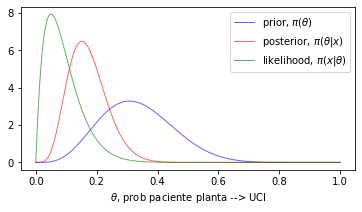%0A)

Como se observa la distribución a *posteriori* se sitúa entre la
distribución a priori (el conocimiento del que dispongo antes de
realizar el experimento) y la *verosimilitud* (el conocimiento que me
aporta *exclusivamente* el resultado del experimento).

En el problema estamos interesados en hallar el valor esperado de la v.a
\$\\theta\$ para las distribuciones *a priori* y *a posteriori*. O lo
que es lo mismo, debemos hallar el valor esperado de una v.a aleatoria
que se distribuye según una \$Beta (\\theta \|\\alpha, \\beta)\$ de
parámetros conocidos. Se puede demostrar que

\$\$ \\mu = E\[\\theta\] := \\int\_0^1 \\theta \\; B(\\theta \| \\alpha,
\\beta) \\; d\\theta = \\frac{\\alpha}{\\alpha + \\beta} \$\$

**¿Qué ocurre cuando aumenta el tamaño del experimento?**

En la gráfica siguiente se ha incrementado la muestra del experimento,
\$n=100\$, pero manteniendo el ratio \$k/n=0.05\$ del experimento
original

    Expected probability a priori: 0.333 
    Expected probability a posterior: 0.087
    Maximum likelihood: 0.050
    Experimento: 
     Total pacientes:100  UCI:5

![](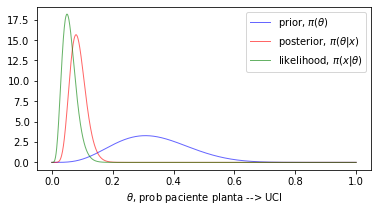%0A)

Algunas consecuencias interesantes a partir del conocimiento de la
expresión analítica de \$\\pi(\\theta \| x)\$:

-   Al ser \$\\pi(\\theta\|x)\$ también una distribución Beta, el valor
    esperado de \$\\theta\$ a posteriori, i.e., después de observar el
    resultado del experimento, es

\$\$ \\mu\_{posterior} = \\frac{\\alpha'}{\\alpha' + \\beta'} =
\\frac{\\alpha + k}{\\alpha + k + \\beta + n - k} \$\$

Cuando el número de pacientes del experimento es muy grande, \$n, k \\to
\\infty\$, \$\\mu\_{posterior}\$ converge al valor de máxima
verosimilitud (MLE) \$k/n\$. Es decir, cuando \$n \\to \\infty\$, **el
*conocimiento a priori* es irrelevante frente a la información que
aporta el experimento.**

-   **La *incertidumbre* en torno al valor esperado
    \$\\mu\_{posterior}\$ decrece con \$n \\to \\infty\$**

\$\$ \\sigma^2 = \\lim\_{n \\to \\infty} \\frac{ \\alpha' \\beta'}{
(\\alpha' + \\beta')^2 (\\alpha' + \\beta' +1) } = \\frac{k n -k^2}{n^3}
= 0 \$\$

\\begin{remark} El valor máximo de la verosimilitud MLE de una v.a
\$\\theta\$ es el valor de \$\\theta\$ para el cúal la función de
verosimilitud es máxima \$\$ \\theta\_{MLE} =
\\\\text{argmax}\_{\\theta} \\pi(x \| \\theta) \$\$ Habitualmente se
calcula maximizando el logarítmo de \$\\pi(x\|\\theta)\$ \$\$
\\frac{\\partial}{\\partial \\theta} log (\\pi (x \| \\theta) ) = 0 \$\$
Para este problema, en el que \$\\pi(x\| \\theta)\$ está dada por la
ecuación (5) \$\$ \\frac{\\partial }{\\partial \\theta}\\left( k log
(\\theta ) + (n-k) \\log(1-\\theta) \\right) = 0 \$\$ se obtiene
\$\\theta\_{MLE}\$ = k/n \\end{remark}

Expected prob a priori: 0.3333333333333333
Expected prob a posterior: 0.17142857142857143
Experimento: 
 Total pacientes: 20 	 UCI: 1


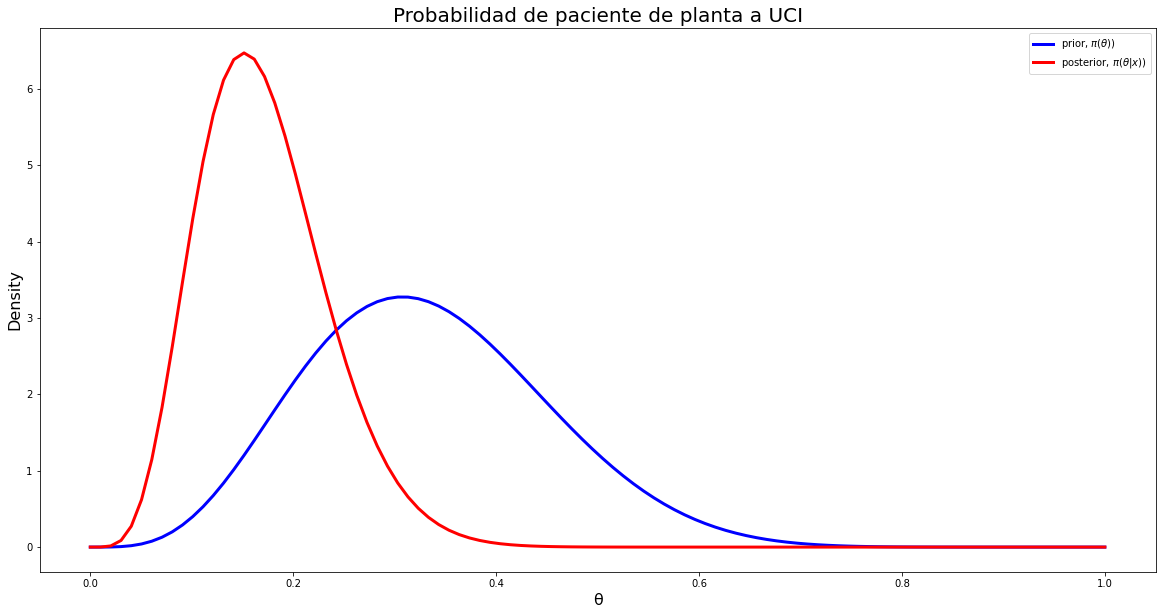

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, binom
from scipy.integrate import quad

#data = np.random.binomial(n=1, p=0.2, size=100)

def integrand1(theta, k, n):
    return ((theta**(k+1))*(1-theta)**(n-k))*beta(a, b).pdf(x=theta)

def integrand2(theta, k, n):
    return (theta**k)*(1-theta)**(n-k)*beta(a, b).pdf(x=theta)

def plot_ex1(a, b, k, n):
    theta_range = np.linspace(0, 1, 100)
    prior = beta(a, b).pdf(x=theta_range)
    e_prior = a/(a+b)
    print("Expected prob a priori: {0}".format(e_prior))

    #likelihood = binom.pmf(k=np.sum(data), n=len(data), p=a/(a+b))
    #likelihood = (theta_range**k)*(1-theta_range)**(n-k)
    likelihood = binom.pmf(k=1, n=20, p=theta_range)

    posterior = beta(a+k, b+(n-k)).pdf(x=theta_range)
    normalized_posterior = posterior / np.sum(posterior)

    e_posterior = quad(integrand1, 0, 1, args=(k,n))[0] / quad(integrand2, 0, 1, args=(k,n))[0]
    print("Expected prob a posterior: {0}".format(e_posterior))

    #print("Maximum likelihood: {0}".format(likelihood))

    print("Experimento: \n Total pacientes: {0} \t UCI: {1}".format(n, k))

    plt.figure(figsize=(20,10))
    plt.title('Probabilidad de paciente de planta a UCI', fontsize=20)
    plt.plot(theta_range, prior, label=r'prior, $\pi(\theta))$', linewidth=3, color='blue')
    plt.plot(theta_range, posterior, label=r'posterior, $\pi(\theta|x))$', linewidth=3, color='red')
    #plt.plot(theta_range, likelihood, label=r'likelihood, $\pi(x|\theta))$', linewidth=3, color='yellowgreen')
    plt.xlabel('θ', fontsize=16)
    plt.ylabel('Density', fontsize=16)
    plt.legend(loc="upper right")
    plt.show()

a, b = 5, 10
k, n = 1, 20
plot_ex1(a, b, k, n)

Expected prob a priori: 0.3333333333333333
Expected prob a posterior: 0.08695645045706057
Experimento: 
 Total pacientes: 100 	 UCI: 5


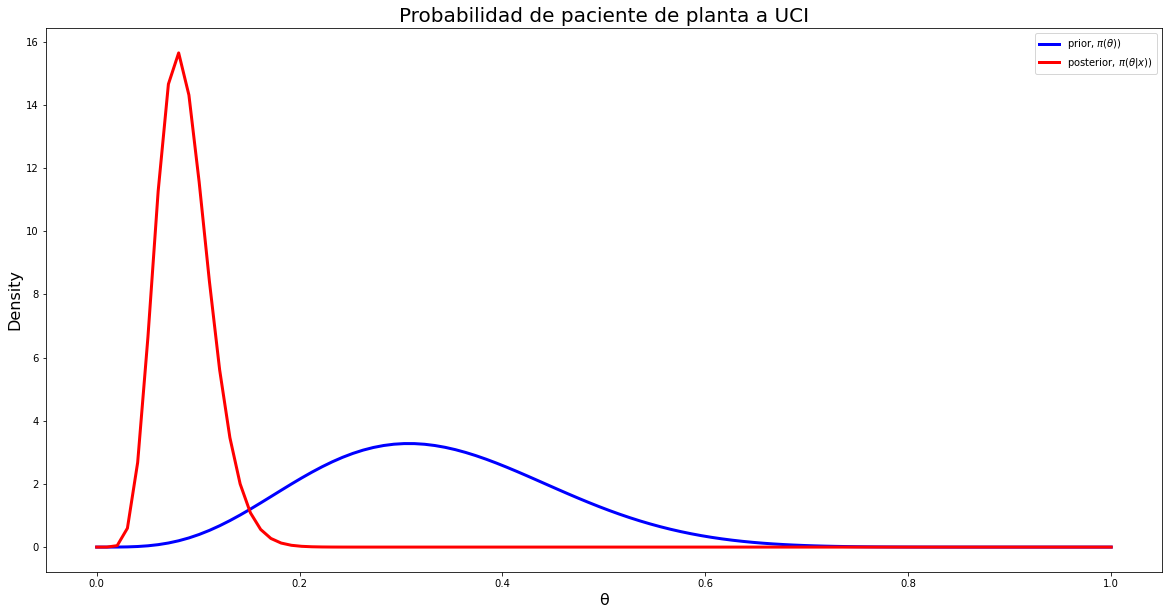

In [71]:
a, b = 5, 10
k, n = 5, 100
plot_ex1(a, b, k, n)

#### Simulación Monte Carlo<a href="#Simulación--Monte-Carlo" class="anchor-link">¶</a>

    Expected probability a posteriori MC: 0.088286 +- 0.020
    Confidence interval α = 0.22
    Experimento: 
     Total pacientes:100  UCI:5

![](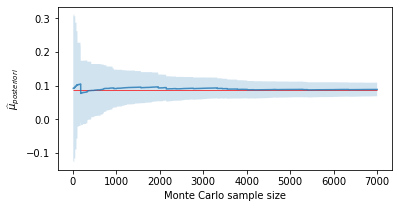%0A)

\\begin{remark} \*\*Propogación del error\*\* Supongamos que \$Z\$ es el
cociente de dos v.a \$Z= X/Y\$, si estimamos el valor esperado de
\$\\mu\_Z\$ por ejemplo mediante \$\$ \\widehat{\\mu\_z} =
\\frac{\\sum\_{i=1}^n x\_i}{\\sum\_{i=1}^n y\_i} \$\$ donde \$\\{x\_0,
x\_1, \\ldots, x\_n \\}\$ y \$\\{y\_0, y\_1, \\ldots, y\_n \\}\$ son
muestras de \$X\$ e \$Y\$ respectivamente ¿cómo estimar la varianza de
\$\\widehat{\\mu\_z}\$? Podemos interpretar \$x\$ e \$y\$ como una
\*medida con un error asociado\* (\$x\\pm \\delta x\$, \$x\\pm \\delta
x\$) y estimar el error de la medida de \$z\$ en el \*peor caso\*
\\begin{align} (z + \\delta z) (y + \\delta y) &= x + \\delta x \\\\ z
\\ y + z \\, \\delta y + y \\, \\delta z + \\delta z \\; \\delta y &= x
+ \\delta x \\\\ \\end{align} Si en la ecuación anterior se dividen los
dos miembros por \$x\$ y asumiendo \*el peor caso (los errores se
suman)\* \$\$ \\frac{\\delta z}{z} = \\frac{\\delta x}{x} +
\\frac{\\delta y}{y} \$\$ \\end{remark}

-   **Cuestiones**:

    -   ¿Por que se debe utilizar la misma muestra de \$\\theta\$ en el
        numerador y denominador para estimar \$\\mu\_{posterior}\$?
    -   ¿Por que a la hora de hacer la simulación de M.C hemos podido
        utilizar una función sin normalizar proporcional a \$\\pi(x \|
        \\theta)\$ eq. (5) y **no** \$\\pi(x \| \\theta)\$?

-   **Importante:**

    -   Fíjate que el metodo de Monte Carlo nos ha permitido calcular el
        valor esperado de \$\\theta\$ a posteriori **sin** necesidad de
        disponer de una muestra de la distribución a posteriori
        \$\\pi(\\theta\|x)\$.

    -   Siempre debes validar tu simulación:

        -   En este caso puedes *validar* tu simulación frente al
            resultado teórico conocido ¿Se comporta correctamente tu
            estimación cuando aumenta el tamaño del experimento?
        -   ¿Cómo de fiable es la estimación del error que hemos hecho?
            Discute que valor de \$z\_{\\alpha/2}\$ es apropiado.

-   **....y algo mas**

    -   Supón que no se dispone de un generador de números aleatorios
        para la distribución a priori (porqué o bien no dispones de un
        algoritmo o este es muy ineficaz) ¿Podrías estimar
        \$\\mu\_{posterior}\$? Estima el valor de \$\\mu\_{posterior}\$
        **sin** utilizar el generador de una muestra de Beta (por
        ejemplo utiliza una distribución \$\\mathcal{U}(0,1)\$). Discute
        el intervalo de confianza de la estimación.

    Expected probability a posteriori MC: 0.086273 +- 0.013
    Confidence interval α = 0.22
    Experimento: 
     Total pacientes:100  UCI:5

Ejercicio 2<a href="#Ejercicio-2" class="anchor-link">¶</a>
-----------------------------------------------------------

\\begin{exercise} Estimar empíricamente la función de densidad de
probabilidad \*a posteriori\* \$\\pi(\\theta \| x)\$ del ejercicio
anterior y validarla con el resultado teórico. Discutir los resultados
\\end{exercise}

### Introducción<a href="#Introducción" class="anchor-link">¶</a>

Si recuerdas en el ejercicio anterior estimamos, utilizando Monte Carlo,
el valor esperado de \$\\theta\$ *a posteriori*, es decir, una vez
realizado el experimento. Recuerda que lo estimamos **sin** necesidad de
conocer la distribución a posteriori \$\\pi(\\theta \| x)\$. Para ello
utilizamos el Teorema de Bayes. Además validamos nuestra estimación con
la solución analítica.

Ahora nos planteamos ¿es posible generar una muestra de la variable
aleatoria de la distribución *a posteriori* \$\\pi(\\theta \| x)\$?.
Para ello se propone utilizar un método de aceptación y rechazo y
validarlo con la solución analítica.

### Ayuda<a href="#Ayuda" class="anchor-link">¶</a>

El algoritmo consistirá en generar una muestra \$\\{\\theta\_0,
\\theta\_1, \\theta\_2, \\cdots, \\theta\_n\\}\$ de la distribución *a
priori* \$\\pi(\\theta)\$ y aceptar como valores de la distribución *a
psoteriori* \$\\pi(\\theta \| x)\$ aquellos \$\\theta\_i\$ que
satisfagan un determinado criterio de aceptación/rechazo.

-   Un algoritmo y criterio *tentativo* podría ser:

> 1.  Generar una muestra \$\\{\\theta\_0, \\theta\_1, \\theta\_2,
>     \\cdots, \\theta\_n\\}\$ de la distribución a priori
>     \$\\pi(\\theta)\$
> 2.  Aceptar \$\\theta\_i\$ con probabilidad \$\$ p = \\frac{
>     \\pi(\\theta\_i \| x) }{c \\cdot \\pi(\\theta\_i) } \$\$ donde
>     \$c\$ es, como de costumbre, una constante tal que para todo
>     \$\\theta\$, \$p \\in \[0, 1\]\$. Para aplicar el criterio
>     anterior podríamos, como de costumbre, generar una muestra
>     \$\\{u\_0, u\_1, u\_2, \\cdots, u\_n\\}\$ de la distribución
>     uniforme \$U(0,1)\$ y aceptar \$\\theta\_i\$ si \$u\_i \< \\frac{
>     \\pi(\\theta\_i \| x) }{c \\cdot \\pi(\\theta\_i) }\$

Es decir, tratamos de aplicar el mismo algoritmo de aceptación/rechazo
visto en clase. El problema con este *criterio tentativo* es evidente.
Para aplicarlo necesitamos: (i) evaluar \$\\pi(\\theta \| x)\$ en
\$\\theta\_i\$ y (ii) calcular previamente el valor de la constante
\$c\$. Pero ¿Cómo podemos hacerlo si precisamente desconocemos la
distribución \$\\pi(\\theta \| x)\$?

-   ¿Qúe podemos hacer? Recurrir al Teorema de Bayes \$\$ \\frac{
    \\pi(\\theta \| x) }{ \\pi(\\theta) } = \\frac{ \\pi(x \| \\theta) }
    { \\int\_{-\\infty}^{\\infty} \\pi(x \| \\theta) \\pi(\\theta) \\;
    d\\theta} \$\$

    pero, en vez de utilizar el lado izquierdo de la ecuación anterior
    para evaluar la probabilidad \$p\$ de aceptar \$\\theta\_i\$ como en
    la ecuación (21), utilizar el miembro derecho de (22). Sin embargo,
    aun nos falta estimar el valor de \$c\$. Necesitamos *normalizar* el
    cociente \$\\frac{ \\pi(x \| \\theta) } {
    \\int\_{-\\infty}^{\\infty} \\pi(x \| \\theta) \\pi(\\theta) \\;
    d\\theta} \$ por una constante \$c\$ para que su valor este
    comprendido en el intervalo \$\[0, 1\]\$. Pero esto no es
    complicado. Sabemos que *necesariamente* \$\\frac{ \\pi(x \|
    \\theta) } { \\int\_{-\\infty}^{\\infty} \\pi(x \| \\theta)
    \\pi(\\theta) \\; d\\theta} \$ está acotado: el numerador es una
    función densidad de probabilidad y el denominador es una constante,
    no depende de \$\\theta\$. Es decir que \$\$ \\frac{ \\pi(x \|
    \\theta) } { \\int\_{-\\infty}^{\\infty} \\pi(x \| \\theta)
    \\pi(\\theta) \\; d\\theta} \\leq \\frac{ \\text{argmax}\_{\\theta}
    \\left( \\pi(x \| \\theta) \\right) } { \\int\_{-\\infty}^{\\infty}
    \\pi(x \| \\theta) \\pi(\\theta) \\; d\\theta} = c \$\$

    donde \$\\text{argmax}\_{\\theta} \\left( \\pi(x \| \\theta)
    \\right)\$ representa al valor máximo de la verosimilitud \$\\pi(x
    \| \\theta)\$. Es decir, ni siquiera necesitamos calcular la
    integral \$\\int\_{-\\infty}^{\\infty} \\pi(x \| \\theta)
    \\pi(\\theta) \\; d\\theta\$ ya que cuando dividamos la
    ecuación (22) por \$c\$ se nos va a cancelar!!!

Además sabemos que la función de verosimilitud alcanza su máximo cuando
\$\\theta \$ es el *valor máximo de verosimilitud* \$\\theta\_{MLE} =
k/N\$, siendo \$N\$ el número total de pacientes y \$k\$ el número de
pacientes que ingresan en la UCI. Recopilando todo:

-   Algoritmo final para obtener una muestra de \$\\pi(\\theta \|
    x)\$ \>

    > 1.  Calcular \$a = \\text{argmax}\_{\\theta} \\left( \\pi(x \|
    >     \\theta) \\right) \$
    > 2.  Generar una muestra \$\\{\\theta\_0, \\theta\_1, \\theta\_2,
    >     \\cdots, \\theta\_n\\}\$ de la distribución a priori
    >     \$\\pi(\\theta)\$
    > 3.  Aceptar \$\\theta\_i\$ con probabilidad \$\$ p = \\frac{
    >     \\pi(x \| \\theta) } {c \\cdot \\int\_{-\\infty}^{\\infty}
    >     \\pi(x \| \\theta) \\pi(\\theta) \\; d\\theta} = \\frac{
    >     \\pi(x \| \\theta) }{a} \$\$

### Resultados Simulación Monte Carlo<a href="#Resultados-Simulación-Monte-Carlo" class="anchor-link">¶</a>

En la siguiente gráfica se muestra un histograma con la estimación
empírica de la función de densidad de probabilidad a posteriori
\$\\pi(\\theta \| x)\$ junto con el resultado teórico (en azul
distribución Beta de parámetros \$a\$ y \$b\$ conocidos).

La eficiencia del algoritmo de aceptación/rechazo ha sido del
\$6.52\\%\$

    Efficiency= 0.0652
    KstestResult(statistic=0.009582283853363405, pvalue=0.9256857020767539)

![](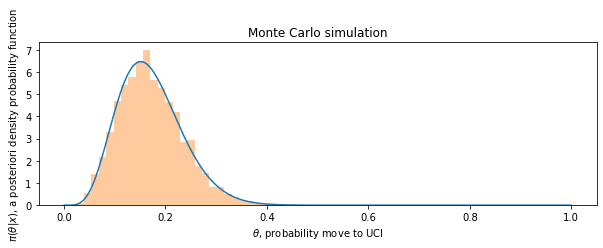%0A)